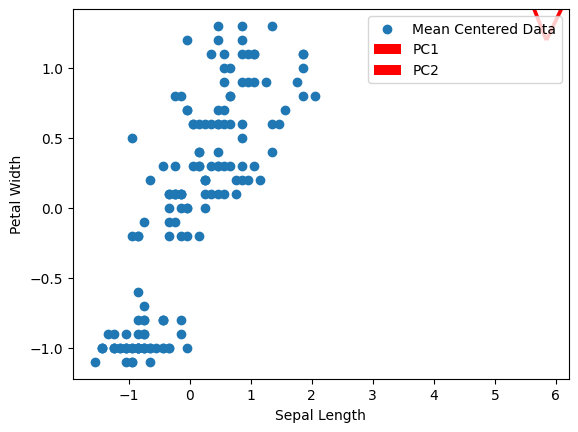

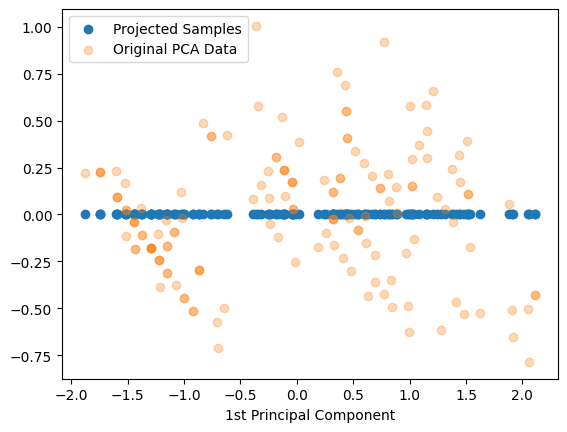

Number of PCs required to capture 96% variance: 2
Number of PCs required to capture 97% variance: 2
Number of PCs required to capture 98% variance: 2


In [5]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load data from the CSV file
data1 = pd.read_csv('./IRIS.csv')

# Extract relevant columns (adjust according to your actual data structure)
data = {
    'sepal_width': data1['sepal_width'],  # Update to match the columns you need
    'petal_width': data1['petal_width'],
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Standardizing the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Applying PCA
pca = PCA(n_components=2)  # Number of components should be <= number of features
principal_components = pca.fit_transform(scaled_data)

# Creating a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Display the principal components
print("Principal Components:\n", principal_df)


In [ ]:
# b) Plot the principal components 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load data from the CSV file
data1 = pd.read_csv('./IRIS.csv')

# Extract relevant columns
data = {
    'sepal_width': data1['sepal_width'],
    'petal_width': data1['petal_width'],
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Calculate the mean of each feature
mean_sepal_width = df['sepal_width'].mean()
mean_petal_width = df['petal_width'].mean()

# Mean-centering the data
mean_centered_data = df - [mean_sepal_width, mean_petal_width]

# Plotting the mean-centered data
plt.figure(figsize=(8, 6))
plt.scatter(mean_centered_data['sepal_width'], mean_centered_data['petal_width'], color='blue', alpha=0.6)
plt.axhline(y=0, color='gray', linestyle='--')
plt.axvline(x=0, color='gray', linestyle='--')
plt.title('Scatter Plot of Mean-Centered Data')
plt.xlabel('Mean-Centered Sepal Width')
plt.ylabel('Mean-Centered Petal Width')
plt.grid(True)
plt.show()


In [ ]:
# c) find out all the principal components for the data shown in Table a
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load data from the CSV file
data1 = pd.read_csv('./IRIS.csv')

# Extract relevant columns
data = {
    'sepal_width': data1['sepal_width'],
    'petal_width': data1['petal_width'],
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Standardizing the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Applying PCA
pca = PCA(n_components=2)  # Number of components should be <= number of features
principal_components = pca.fit_transform(scaled_data)

# Getting the principal components vectors
pc_vectors = pca.components_

# Mean-centering the data (equivalent to scaled_data after StandardScaler)
mean_centered_data = scaled_data

# Plotting the mean-centered data
plt.figure(figsize=(8, 6))
plt.scatter(mean_centered_data[:, 0], mean_centered_data[:, 1], color='blue', alpha=0.6)
plt.axhline(y=0, color='gray', linestyle='--')
plt.axvline(x=0, color='gray', linestyle='--')

# Plotting the principal components
for i in range(len(pc_vectors)):
    plt.quiver(0, 0, pc_vectors[i, 0], pc_vectors[i, 1], angles='xy', scale_units='xy', scale=1, color='red', alpha=0.8)

# Formatting the plot
plt.title('Scatter Plot of Mean-Centered Data with Principal Components')
plt.xlabel('Mean-Centered Sepal Width (Standardized)')
plt.ylabel('Mean-Centered Petal Width (Standardized)')
plt.grid(True)
plt.show()


In [ ]:
# (d) Project samples to first principal component
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load data from the CSV file
data1 = pd.read_csv('./IRIS.csv')

# Extract relevant columns
data = {
    'sepal_width': data1['sepal_width'],
    'petal_width': data1['petal_width'],
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Standardizing the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Applying PCA
pca = PCA(n_components=2)  # Using both components to plot, but will project on the first one
principal_components = pca.fit_transform(scaled_data)

# Extract the first principal component vector
pc1_vector = pca.components_[0]  # First principal component

# Projecting the data onto the first principal component
pc1_projection = np.dot(scaled_data, pc1_vector.reshape(-1, 1))

# Creating a DataFrame for the projected points on the first principal component
projected_points = pc1_projection * pc1_vector

# Plotting the mean-centered data
plt.figure(figsize=(8, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], color='blue', alpha=0.6, label='Mean-Centered Data')
plt.axhline(y=0, color='gray', linestyle='--')
plt.axvline(x=0, color='gray', linestyle='--')

# Plotting the principal components
plt.quiver(0, 0, pc1_vector[0], pc1_vector[1], angles='xy', scale_units='xy', scale=1, color='red', alpha=0.8, label='1st Principal Component')

# Plotting the projections of samples on the first principal component
plt.scatter(projected_points[:, 0], projected_points[:, 1], color='green', alpha=0.8, marker='*', label='Projected Points')

# Formatting the plot
plt.title('Scatter Plot of Mean-Centered Data with Projections on 1st Principal Component')
plt.xlabel('Mean-Centered Sepal Width (Standardized)')
plt.ylabel('Mean-Centered Petal Width (Standardized)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# (e) Function to compute number of required PCA capturing p% variance
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def compute_required_pca(dataframe, p):
    """
    Compute the number of principal components required to capture at least p% of variance.
    
    Parameters:
    dataframe (pd.DataFrame): The input data.
    p (float): The percentage of variance to capture (between 0 and 100).
    
    Returns:
    int: The number of principal components required.
    """
    # Standardizing the features
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(dataframe)
    
    # Applying PCA without specifying n_components to get all components
    pca = PCA()
    pca.fit(scaled_data)
    
    # Calculate cumulative variance explained by each component
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_) * 100
    
    # Find the number of components required to reach at least p% variance
    num_components = np.argmax(cumulative_variance >= p) + 1
    
    return num_components

# Example usage:
# Load data from the CSV file
data1 = pd.read_csv('./IRIS.csv')

# Extract relevant columns
data = {
    'sepal_width': data1['sepal_width'],
    'petal_width': data1['petal_width'],
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Calculate number of components needed for 96%, 97%, and 98% variance
p_values = [96, 97, 98]
for p in p_values:
    num_components = compute_required_pca(df, p)
    print(f"Number of components required to capture {p}% variance: {num_components}")
